In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [5]:
from numpy.typing import ArrayLike

# Typical initialization of sklearn models 

In [2]:
#Example for support vector regression
svr_lin = SVR(kernel="linear", C=100)

#Example for 'GridSearchCV'
svr = GridSearchCV(SVR(kernel="linear"),param_grid={'C': [1, 10]})

#Example for neural network regression
nn = MLPRegressor(hidden_layer_sizes=(20,20),activation='logistic')

# Example figure formatting for the Classification task

## Example for using color maps

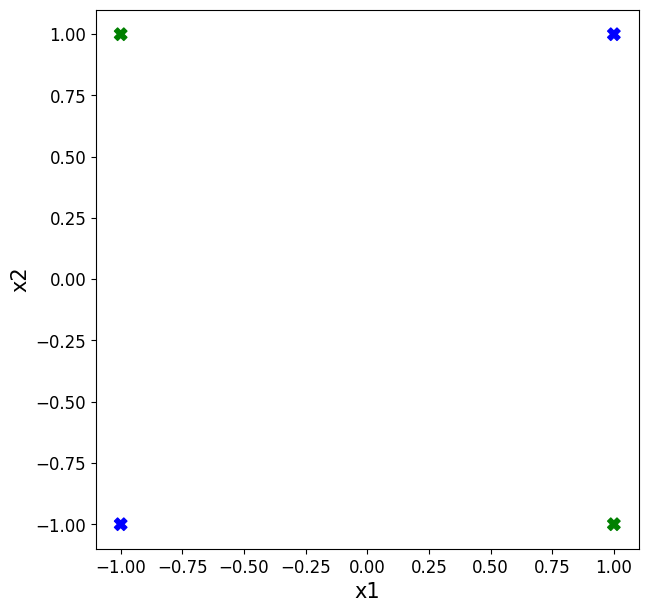

In [3]:
X = np.array(([-1,-1],[-1,1],[1,-1],[1,1]))
y = np.array((1,-1,-1,1))

cm_points = ListedColormap(["green", "blue"])
plt.figure(figsize=(7,7))

plt.scatter(X[:,0],X[:,1],marker='X',s=80,c=y,cmap=cm_points)
plt.xlabel('x1', fontsize=15)
plt.ylabel('x2', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.axis([-1.1,1.1,-1.1,1.1])
plt.show()

## Example using meshgrid

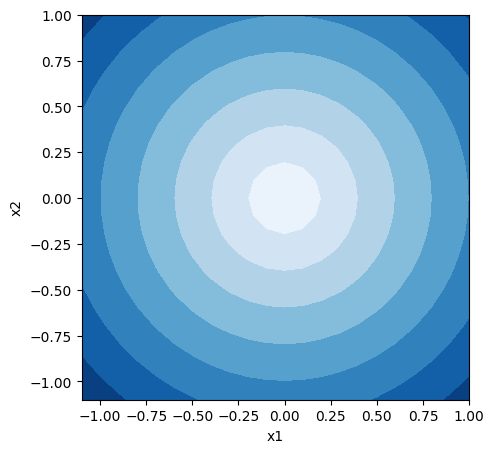

In [4]:
h = 0.1
xx1, xx2 = np.meshgrid(np.arange(-1.1, 1.1, h), np.arange(-1.1, 1.1, h))
Y = np.sqrt(xx1**2 + xx2**2)

cm = plt.cm.Blues
fig,ax = plt.subplots(figsize=(5,5))

cs = ax.contourf(xx1, xx2, Y, cmap=cm, alpha=1.0)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.show()

# Advice on using markdown formatting for your answers

Example showing how latex equations can be rendered in markdown cells: 

inline expressions $\beta = 10$, or multiline expressions 
$$ 
\begin{align*}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align*}
$$
can be rendered with a latex interpreter.
More examples can be found [here](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd). In addition, [here](https://www.markdownguide.org/basic-syntax/) is a useful guide to the markdown syntax.



**Please use these tools to answer the assignments questions within the notebooks using headings to refer to the task. Unclear answers and/or notebooks might result in a reduced grade.** 

For instance the answer to Task 1 should be formatted as:

# Task 1

**Your answers**

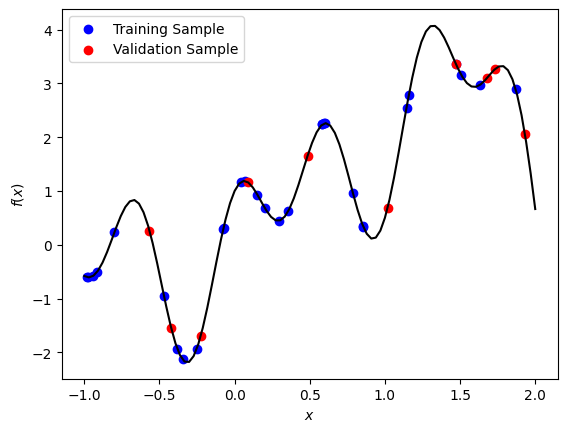

In [32]:
# Task 1.1

def fitting_func(x: ArrayLike) -> ArrayLike:
    return x + 1.5*x**2 + 0.5*x**3 - 0.7*x**4 + np.sin(5*x) + np.cos(10*x)

# Data aquisition
xall = np.linspace(-1, 2, 100).reshape(-1, 1)
yall = fitting_func(xall).flatten()

samples = np.array([np.random.uniform(-1,2) for _ in range(40)])

train_test_splitter = ShuffleSplit(n_splits = 1, train_size=0.75)
train_indices, validation_indices = list(train_test_splitter.split(samples))[0]

xtrain, xvalidation = samples[train_indices].reshape(-1, 1), samples[validation_indices].reshape(-1, 1)
ytrain, yvalidation = fitting_func(xtrain).ravel(), fitting_func(xvalidation).ravel()

plt.plot(xall, fitting_func(xall), 'k')
plt.scatter(xtrain, ytrain, c='b', label='Training Sample')
plt.scatter(xvalidation, yvalidation, c='r', label='Validation Sample')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend()

Linear fit intercept: 0.7098994812565564
Linear fit gradient: 1.445688789864576
Mean squared error: 1.20E+00
Mean absolute error: 0.82
$r^2$ Error Score: 0.61


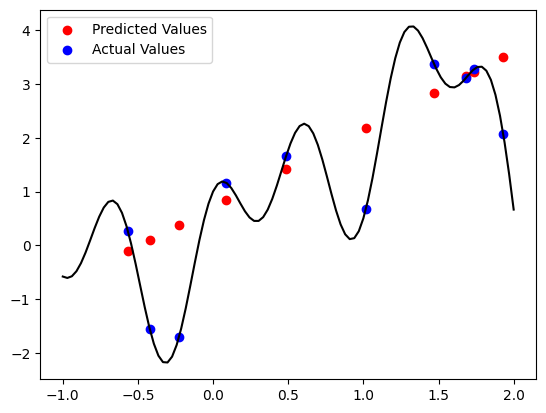

In [44]:
# Task 1.2
from sklearn.svm import SVR
svr_lin = SVR(kernel="linear", C=100)
svr_lin.fit(xtrain, ytrain)

print(f"Linear fit intercept: {svr_lin.intercept_[0]}")
print(f"Linear fit gradient: {svr_lin.coef_[0][0]}")\

ypredicted = svr_lin.predict(xvalidation).ravel()

plt.plot(xall, fitting_func(xall), 'k')
plt.scatter(xvalidation, ypredicted, c='r', label='Predicted Values')
plt.scatter(xvalidation, yvalidation, c='b', label='Actual Values')
plt.legend()

print(f"Mean squared error: {mean_squared_error(yvalidation, ypredicted):.2E}")
print(f"Mean absolute error: {mean_absolute_error(yvalidation, ypredicted):.2f}")
print(fr"$r^2$ Error Score: {r2_score(yvalidation, ypredicted):.2f}")

As can be seen from the differences in the validation data and the predicted data, this function is not well approximated by a linear fit. 

Mean squared error: 7.87E-02
Mean absolute error: 0.21
$r^2$ Error Score: 0.97


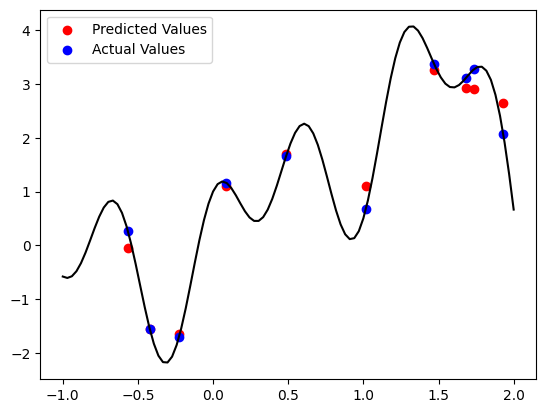

In [53]:
# Task 1.3

svr_gauss = SVR(kernel="rbf")
svr = GridSearchCV(svr_gauss,param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.01,0.1,1,10,100]})

# print(dir(svr))

svr.fit(xtrain, ytrain)

ypredicted = svr.predict(xvalidation)

plt.plot(xall, fitting_func(xall), 'k')
plt.scatter(xvalidation, ypredicted, c='r', label='Predicted Values')
plt.scatter(xvalidation, yvalidation, c='b', label='Actual Values')
plt.legend()

print(f"Mean squared error: {mean_squared_error(yvalidation, ypredicted):.2E}")
print(f"Mean absolute error: {mean_absolute_error(yvalidation, ypredicted):.2f}")
print(fr"$r^2$ Error Score: {r2_score(yvalidation, ypredicted):.2f}")

Mean squared error: 8.57E-02
Mean absolute error: 0.19
$r^2$ Error Score: 0.97


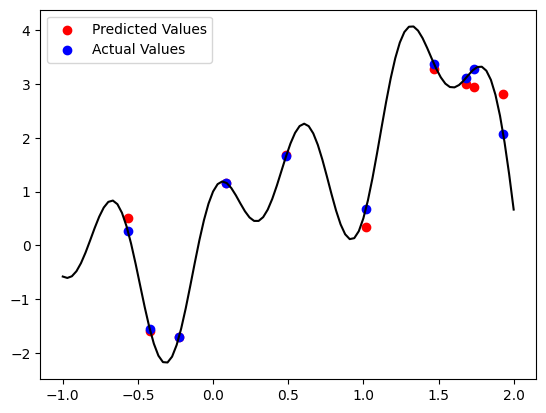

In [58]:
# Task 1.4 - Neural Network

nn = MLPRegressor(hidden_layer_sizes=(30,30),activation='logistic', solver='lbfgs', max_iter=10000)

nn.fit(xtrain, ytrain)

ypredicted = nn.predict(xvalidation)

plt.plot(xall, fitting_func(xall), 'k')
plt.scatter(xvalidation, ypredicted, c='r', label='Predicted Values')
plt.scatter(xvalidation, yvalidation, c='b', label='Actual Values')
plt.legend()

print(f"Mean squared error: {mean_squared_error(yvalidation, ypredicted):.2E}")
print(f"Mean absolute error: {mean_absolute_error(yvalidation, ypredicted):.2f}")
print(fr"$r^2$ Error Score: {r2_score(yvalidation, ypredicted):.2f}")

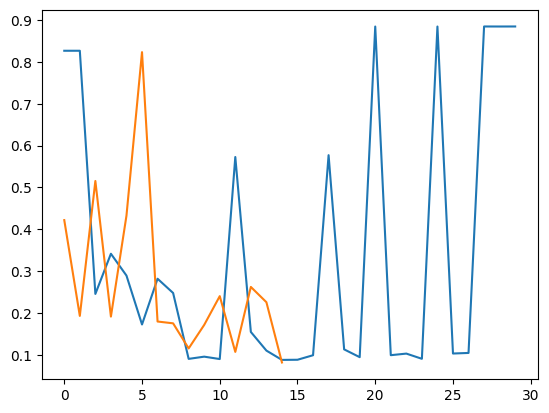

In [66]:
mse_arr_1_layer, mse_arr_2_layer = [], []
for i in range(30):
    _nn = MLPRegressor(hidden_layer_sizes=(1,i+1),activation='logistic', solver='lbfgs', max_iter=10000)
    _nn.fit(xtrain, ytrain)
    
    mse_arr_1_layer.append(mean_squared_error(yvalidation, _nn.predict(xvalidation)))
    if (i+1)%2:
        _nn = MLPRegressor(hidden_layer_sizes=(2,int((i+1)/2 + 1)),activation='logistic', solver='lbfgs', max_iter=10000)
        _nn.fit(xtrain, ytrain)
    
        mse_arr_2_layer.append(mean_squared_error(yvalidation, _nn.predict(xvalidation)))
    

plt.plot(mse_arr_1_layer)
plt.plot(mse_arr_2_layer)
